In [1]:
import ModelViz
#import xarray as xr
#import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd
#import matplotlib as mpl
#import cartopy.crs as ccrs
#from cartopy.feature import NaturalEarthFeature


/local1/data/scratch/pmlersem/rmi/mamba/envs/tslearn_env/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


Create an instance of the ModelViz class, then use the functions to 
* `load_data / load_mfdata` to load data
* `load_grid` to load grid information
* `summarise_features` to sum sets of variables together
* `preprocess` to strip boundary and normalise 
* `make_tsds` to reshape data into a time series data set (tsds)
* `load_tsds` to load an existing time series data set from csv
* `train` to create a clustering model
* `load_model` to load an existing model
* `predict` to create predictions based on a tsds and model
* `get_cluster_info` to summarise predictions and calcuate mean/std dev for each cluster
* `plot_map` to plot the cluster output as a map
* `plot_ts` to plot time series for each cluster


## Train the model

Create an instace of ModelViz for the training data, read in that data and grid info

In [49]:
train = ModelViz.ModelViz()
#train.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_200[0-4]*.nc')
# weird formatting of my data....
train.x_strip = slice(15,-15)
train.y_strip = slice(15,-15)

classification = 'biogeo'
depth = 'bottom'

if classification == 'physics':
    #amm7_mean_2001-2004_surface_physics.nc
    train.cluster_vars = ['votemper','vosaline','mldr10_1']
    plot_vars={'votemper':'Temperature','vosaline':'Salinity','mldr10_1':'Mixed layer depth'}
if classification == 'biogeo':
    #amm7_1y_median_biogeo.nc
    #amm7_mean_2001-2004_surface_biogeo.nc
    train.cluster_vars = ['N1_p','N3_n','N5_s','O2_o'] #'N4_n',,'O3_c','O3_TA'] #,'O3_c'
    plot_vars={'N1_p':'Phosphate','N3_n':'Nitrate','N5_s':'Silicate','O2_o':'Oxygen'} #,'O3_c':'DIC','O3_TA':'Alkalinity'} ,'N4_n':'Ammonium'
# benthic
# amm7_mean_2001-2004_benthic.nc
#train.cluster_vars = ['Y2_c','Y3_c','Y4_c','H1_c','H2_c','Q1_c','Q6_c']
#plot_vars = {'Y2_c':'Deposit\nfeeders','Y3_c':'Suspens.\nfeeders','Y4_c':'Meiofauna','H1_c':'Aerobic\nbac','H2_c':'Anaerobic\nbac','Q1_c':'DOC','Q6_c':'POC'}
# ecosys
#amm7_mean_2001-2004_surface_ecosys.nc
#train.cluster_vars = ['Phytoplankton','Zooplankton','DOC','POC','B1_c']
#plot_vars={'Phytoplankton':'Phytoplankton','Zooplankton':'Zooplankton','DOC':'DOC','POC':'POC','B1_c':'B1_c'}

filename = '/data/proteus1/scratch/rmi/classifications/COMFORT_data/amm7_mean_2001-2004_'+depth+'_'+classification+'.nc'
train.load_data(filename)
train.load_grid('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/domain_cfg.nc')
sum_vars={'Phytoplankton': ['P1_c', 'P2_c', 'P3_c', 'P4_c'],
            'Zooplankton': ['Z4_c', 'Z5_c', 'Z6_c'],
            'DOM': ['R1_c', 'R2_c', 'R3_c'],
            'POM': ['R4_c', 'R6_c', 'R8_c']}
#train.summarise_features(sum_vars)
train.norm = 'stdev'
train.preprocess(do_slice=False)     
train.make_tsds()

In [48]:
train.ds

<xarray.Dataset>
Dimensions:  (time: 1, y: 345, x: 267)
Coordinates:
  * time     (time) int64 1
    nav_lat  (y, x) float32 41.07 41.07 41.07 41.07 ... -1.0 -1.0 -1.0 -1.0
    nav_lon  (y, x) float32 -18.22 -18.11 -18.0 -17.89 ... -1.0 -1.0 -1.0 -1.0
    deptht   float32 ...
Dimensions without coordinates: y, x
Data variables:
    N1_p     (time, y, x) float32 1.569 1.568 1.562 1.534 ... nan nan nan nan
    N3_n     (time, y, x) float32 1.383 1.385 1.386 1.4 ... nan nan nan nan
    N4_n     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    N5_s     (time, y, x) float32 1.879 1.877 1.878 1.949 ... nan nan nan nan
    O2_o     (time, y, x) float32 -0.9551 -0.9626 -0.9613 ... nan nan nan
    O3_c     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    O3_TA    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan

Combine variables and preprocess - stripping the boundary layers and normalising

Make the dataset by reshaping the data into the form needed 

Fit the model (can take some time) and save

In [50]:

train.n_init = 10
train.seed = 800
train.train(n_clusters=6, save=False,model_name = 'kmeans') #, file_path='model.ks')
train.predict()
train.get_cluster_info(save=False)

Processing N1_p


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 82.56it/s]


Processing N3_n


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 88.75it/s]


Processing N5_s


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 92.07it/s]


Processing O2_o


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 77.58it/s]


In [8]:
train.n_clusters

11

Produce a prediction of the training data

Create cluster dataset with the classification map, plus mean and std dev time series for each cluster

Plot data

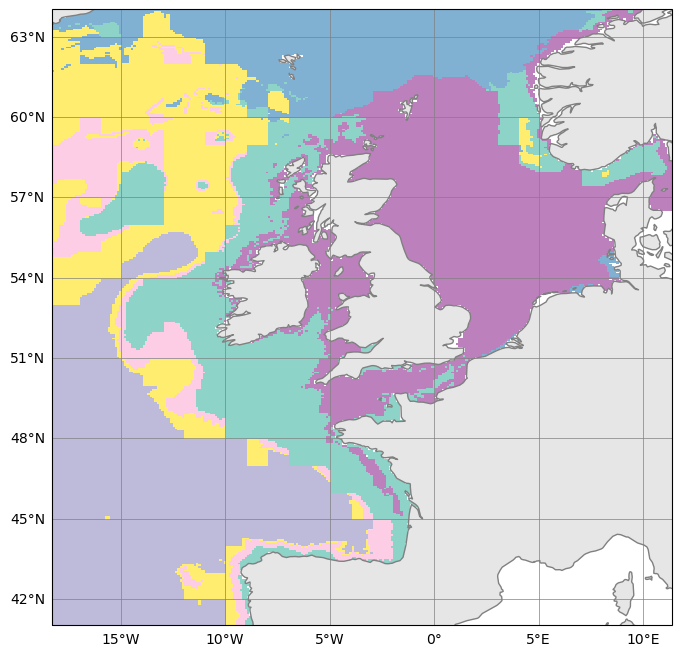

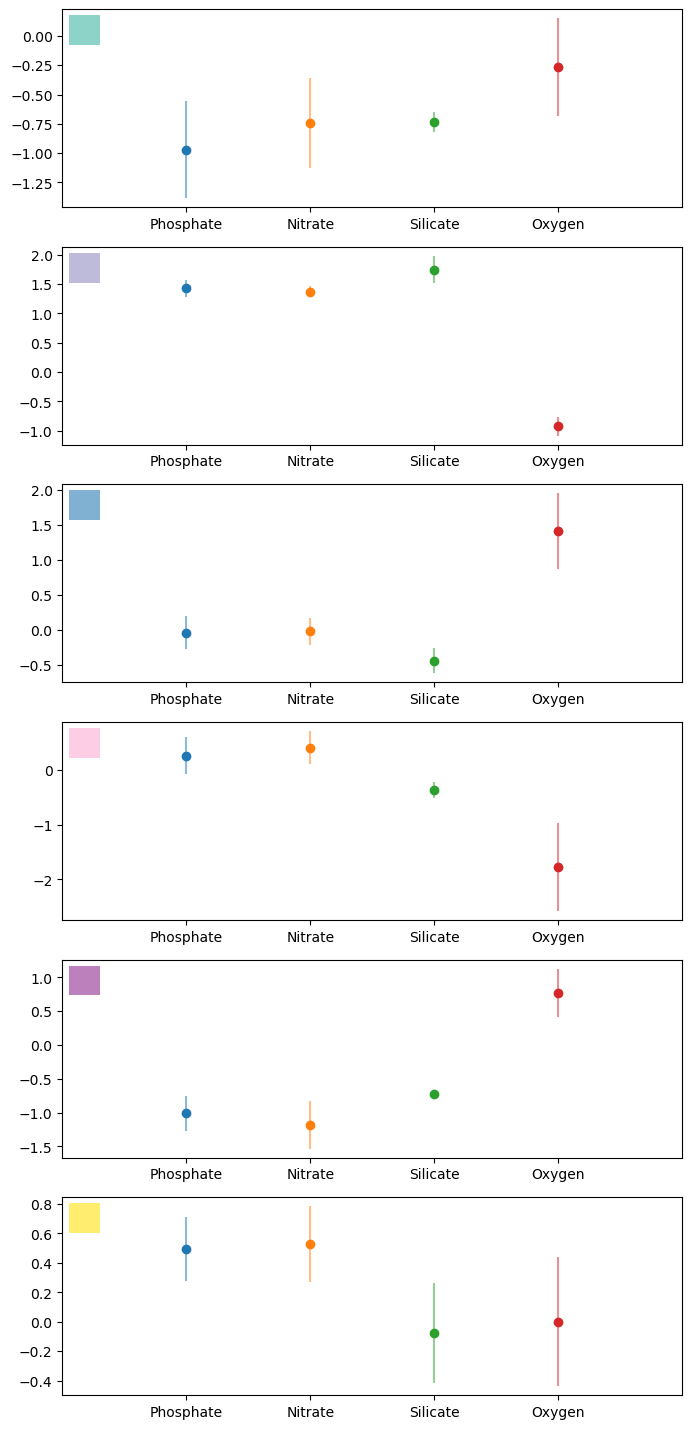

In [51]:
plot_name = 'figures/k-means-amm7-COMFORT-surface_'+classification+'_stdev_map_'+str(train.n_clusters)+'.png'
train.plot_map(savefig=True,file_path=plot_name)
plot_name = 'figures/k-means-amm7-COMFORT-surface_'+classification+'_stdev_av_'+str(train.n_clusters)+'.png'

train.plot_vars(plot_vars=plot_vars,savefig=True,file_path=plot_name)

## Form prediction using new data

Make a new instance, load our model, and dataset and grid infomation.

In [ ]:
predict = ModelViz.ModelViz()

In [ ]:
predict.load_model('model.ks')

In [ ]:
predict.load_mfdata('../../AMM7-MONTHLY-SURFACE/amm7_200[5-9]*.nc')
predict.load_grid('../../AMM7-MONTHLY-SURFACE/domain_cfg.nc')

In [ ]:
phys = ModelViz.ModelViz()
phys.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_TS_200[5-9]*.nc')
phys.ds = phys.ds.rename_dims({'y_grid_T':'y','x_grid_T':'x'}).rename({'nav_lat_grid_T':'nav_lat','nav_lon_grid_T':'nav_lon'})
predict.ds = xr.merge([predict.ds,phys.ds[['votemper','vosaline']]])

Summarise and preprocess data

In [ ]:
predict.summarise_features(sum_vars)
predict.cluster_vars = ['votemper','vosaline','N1_p', 'N3_n', 'N4_n', 'N5_s', 'O2_o', 'B1_c','O3_c', 'O3_TA', 'Phytoplankton', 'Zooplankton', 'DOM', 'POM']
predict.preprocess()

Create the tsds, produce the prediction and create cluster dataset

In [ ]:
predict.make_tsds()
predict.predict()
predict.n_clusters = 5
predict.get_cluster_info(save=True, file_path='predicted_clusters.nc')

Plot output

In [ ]:
predict.plot_map()
predict.plot_ts(plot_vars={'votemper':'Temperature','N3_n':'Nitrate','Phytoplankton':'Phyto', 'POM':'POM'})

Plot time series with rescaled values

In [ ]:
predict.cluster_ds = predict.cluster_ds.groupby('time.month').mean().rename({'month':'time'})

In [ ]:
plot_vars = {'N3_n':'Nitrate','votemper':'Temperature'}
predict.plot_ts(plot_vars=plot_vars,rescale=True)